# N2V Training

Here we train N2V on single noisy images. This allows us to create a pseudo-ground truth, which further allows estimation of the noise model in the notebooks ```1a_CreateNoiseModel_GMM.ipynb``` or ```1b_CreateNoiseModel_Histogram.ipynb```. Use this (```1_N2VTraining.ipynb```) and ```2_N2VPrediction.ipynb``` if you wish to test the Bootstrap Mode or if the calibration data is not available.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../../')
import unet.model
from unet.model import UNet

from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from https://cloud.mpi-cbg.de/index.php/s/BE8raMtHQlgLDF3/download. Here we show the pipeline for Convallaria dataset. Save the dataset in an appropriate path. For us, the path is the data folder which exists at `../../../`. For Convallaria, the data to be denoised is named ```20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif```. 

In [2]:
# Download data
import os
import urllib
import zipfile

if not os.path.isdir('../../../data'):
    os.mkdir('../../../data')

zipPath="../../../data/Convallaria_diaphragm.zip"
if not os.path.exists(zipPath):  
    data = urllib.request.urlretrieve('https://cloud.mpi-cbg.de/index.php/s/BE8raMtHQlgLDF3/download', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("../../../data")


### Load Data
#### Check ```filename``` and specify the ```dataname```  

In [4]:
path='../../../data/Convallaria_diaphragm/'
fileName='20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif'
dataName='convallaria' # This will be used to name the noise2void model

Run the cells below

In [5]:
data=imread(path+fileName)
nameModel=dataName+'_n2v'

### Create the Network and Train it
This can take a while.

In [6]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix= nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch = 10, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

../../../unet/model.py:215: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
../../../unet/model.py:216: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)
/home/lalit/Desktop/01_Softwares/anaconda3/envs/ppn2vEnv/lib/python3.7/site-packages/torch/cuda/__init__.py:118: UserWarning: 
    Found GPU1 NVS 310 which is of cuda capability 2.1.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


Epoch 0 finished      
avg. loss: 0.20239634923636912+-(2SEM)0.05569800943928371      
Epoch 1 finished      
avg. loss: 0.14513351153582335+-(2SEM)0.049715795929355364      
Epoch 2 finished      
avg. loss: 0.15295925680547953+-(2SEM)0.04508809044044676      
Epoch 3 finished      
avg. loss: 0.14092073030769825+-(2SEM)0.04740127661280228      
Epoch 4 finished      
avg. loss: 0.10981210693717003+-(2SEM)0.03303428283075666      
Epoch 5 finished      
avg. loss: 0.1322529822587967+-(2SEM)0.040912013401513465      
Epoch 6 finished      
avg. loss: 0.12764069400727748+-(2SEM)0.036534413774688544      
Epoch 7 finished      
avg. loss: 0.12203694637864829+-(2SEM)0.03510222328392374      
Epoch 8 finished      
avg. loss: 0.13934508049860597+-(2SEM)0.035038281155677975      
Epoch 9 finished      
avg. loss: 0.11281194444745779+-(2SEM)0.023784166994010918      
Epoch 10 finished      
avg. loss: 0.14803521819412707+-(2SEM)0.038615460212889696      
Epoch 11 finished      
avg. loss: 0.

Epoch 89 finished      
avg. loss: 0.10502202901989222+-(2SEM)0.027369149754219772      
Epoch 90 finished      
avg. loss: 0.12075661327689886+-(2SEM)0.029645178231275833      
Epoch 91 finished      
avg. loss: 0.11146108359098435+-(2SEM)0.0354759968388324      
Epoch 92 finished      
avg. loss: 0.1035655802115798+-(2SEM)0.020676746657775462      
Epoch 93 finished      
avg. loss: 0.10167416501790286+-(2SEM)0.02602971957503906      
Epoch 94 finished      
avg. loss: 0.12997326981276275+-(2SEM)0.029874782415868228      
Epoch 95 finished      
avg. loss: 0.09070624392479658+-(2SEM)0.017166285554039065      
Epoch 96 finished      
avg. loss: 0.1258944621309638+-(2SEM)0.042504954333563244      
Epoch 97 finished      
avg. loss: 0.10922869080677629+-(2SEM)0.030768383526722964      
Epoch 98 finished      
avg. loss: 0.12029101382941007+-(2SEM)0.03162202632410899      
Epoch 99 finished      
avg. loss: 0.11058346005156636+-(2SEM)0.03395162048030266      
Epoch 100 finished      
avg

Epoch 177 finished      
avg. loss: 0.11658424343913794+-(2SEM)0.018753187148771545      
Epoch   177: reducing learning rate of group 0 to 1.2207e-07.
Epoch 178 finished      
avg. loss: 0.11733490210026502+-(2SEM)0.03160852913718817      
Epoch 179 finished      
avg. loss: 0.12635305039584638+-(2SEM)0.028902498010430957      
Epoch 180 finished      
avg. loss: 0.10856303777545691+-(2SEM)0.028259687637634794      
Epoch 181 finished      
avg. loss: 0.11863648872822523+-(2SEM)0.04132505675420641      
Epoch 182 finished      
avg. loss: 0.10802861414849758+-(2SEM)0.03146506073999191      
Epoch 183 finished      
avg. loss: 0.10162177365273237+-(2SEM)0.02876635623057062      
Epoch 184 finished      
avg. loss: 0.09534604027867317+-(2SEM)0.016146051466500454      
Epoch 185 finished      
avg. loss: 0.10016369838267565+-(2SEM)0.026462547642989467      
Epoch 186 finished      
avg. loss: 0.12744562150910496+-(2SEM)0.0324879606785997      
Epoch 187 finished      
avg. loss: 0.128924

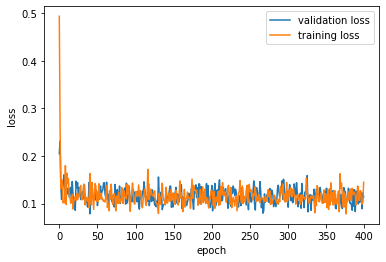

In [6]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()